<center>
<h1 style="color:red; font-size:70px;"> Esercitazione 2</h1>

In [8]:
import time
import numpy as np
import numba as nb
import matplotlib.pyplot as plt

<h1 style="color: blue; font-size:50px;"> Esercizio 1 - Numpy basics</h1>

NumPy (Numerical Python) è una libreria Python che consente di lavorare in modo efficiente con array, matrici e operazioni matematiche. In questo esercizio siamo interessati a prendere dimestichezza con gli array e con il concetto di deep copy. Nel python l'operazione 

```python
b = a
```

non produce una copia, ma  due oggetti coincidono (sono lo stesso array). Per separare le celle di memoria è necessario utilizzare il metodo copy, usando quindi:

```python
c = a.copy()
```

In [2]:
a = np.array([[0.5, -1], [-1, 2]], dtype=np.float32)

# Verifico caratteristiche dell'array
print("Vettore di partenza: \n")
print("Forma del contenitore: ", a.shape)
print("Rango tensore: ", a.ndim)
print("Tipo di dati contenuti: ", a.dtype)


# Utilizzo della funzione flatten, con creazione di deep copy
b = a.copy().flatten()
print("\n\nDeep copy con flattening: \n")
print("Forma del contenitore: ", b.shape)
print("Rango tensore: ", b.ndim)
print("Tipo di dati contenuti: ", b.dtype)


# Assegno zero a indici pari
print("\n\nA zero caselle pari: \n")
print("Vettore prima dell'operazione: ", b)
b[::2] = 0
print("Vettore dopo l'operazione: ", b)

Vettore di partenza: 

Forma del contenitore:  (2, 2)
Rango tensore:  2
Tipo di dati contenuti:  float32


Deep copy con flattening: 

Forma del contenitore:  (4,)
Rango tensore:  1
Tipo di dati contenuti:  float32


A zero caselle pari: 

Vettore prima dell'operazione:  [ 0.5 -1.  -1.   2. ]
Vettore dopo l'operazione:  [ 0. -1.  0.  2.]


In [3]:
a = np.array([1, 2, 3, 4], dtype=np.float32) #dtype mi consente di specificare tipo di dati

# Esempio di "memoria condivisa" (no deep copy)
# Agisco su a, ma l'effetto è evidente anche su b
b = a
print("Esempio copia:\n")

print("Primo vettore pre-operazione: ", a)
print("Secondo vettore pre-operazione: ", b)

a[1] = 1
print("\nPrimo vettore post-operazione: ", a)
print("Secondo vettore post-operazione: ", b)



# Esempio di deep copy (oggetti distinti)
# Agisco su a, ma l'effetto non è evidente su c
c = a.copy()
print("\n\n\nEsempio deep-copy:")

print("Primo vettore pre-operazione: ", a)
print("Secondo vettore pre-operazione: ", c)

a[1] = 2
print("\nPrimo vettore post-operazione: ", a)
print("Secondo vettore post-operazione: ", c)

Esempio copia:

Primo vettore pre-operazione:  [1. 2. 3. 4.]
Secondo vettore pre-operazione:  [1. 2. 3. 4.]

Primo vettore post-operazione:  [1. 1. 3. 4.]
Secondo vettore post-operazione:  [1. 1. 3. 4.]



Esempio deep-copy:
Primo vettore pre-operazione:  [1. 1. 3. 4.]
Secondo vettore pre-operazione:  [1. 1. 3. 4.]

Primo vettore post-operazione:  [1. 2. 3. 4.]
Secondo vettore post-operazione:  [1. 1. 3. 4.]


<h1 style="color: blue; font-size:50px;"> Esercizio 2 - Numpy basics</h1>

Questo esercizio ha come obiettivo quello di mostrare come la libreria Numpy sia ottimizzata per la gestione di operazioni di natura matriciale. Questo aspetto è reso evidente dal confronto del tempo richiesto per moltiplicare un vettore per una matrice mediante tre procedure differenti. In particolare:

1. prodotto scalare implementato usano i primitive types di python

2. prodotto scalare di numpy

3. prodotto scalare compilato con numba

In [4]:
ndat = int(input("Di che dimensione faccio i vettori? "))

# Vettore con entrate casuali e dimensione ndat (fornita da operatore)
vec = np.random.uniform(0.0, 1.0, size=ndat) 
print("Tipo di dati vettore casuale: ", vec.dtype)
print("Size vettore casuale: ", vec.shape)

# Matrice con entrate casuali e dimensione ndat*ndat (fornita da operatore)
mat = np.random.uniform(0.0, 1.0, size=(ndat, ndat)) 
print("\nTipo di dati matrice casuale: ", mat.dtype)
print("Size matrice casuale: ", mat.shape)


# Funzione per fare prodotto scalare
def dotpr(mat, vec):
    if mat.shape[1] != len(vec):
       raise ValueError("Problemi: dimensioni non compatibili fra matrice e vettore!")
    
    appo = np.zeros(mat.shape[0])
    for i in range(0, len(appo)):
        cont = 0
        for j in range(0, len(vec)):
            cont += mat[i][j] * vec[j]
        appo[i] = cont
    
    return appo



# Funzione per fare prodotto scalare (verà compilata)
@nb.njit("float64[:](float64[:,:], float64[:])", parallel=True)
def dotprcomp(mat, vec):
    if mat.shape[1] != len(vec):
       raise ValueError("Problemi: dimensioni non compatibili fra matrice e vettore!")
    
    appo = np.zeros(mat.shape[0])
    for i in range(0, len(appo)):
        cont = 0
        for j in range(0, len(vec)):
            cont += mat[i][j] * vec[j]
        appo[i] = cont
    
    return appo

Tipo di dati vettore casuale:  float64
Size vettore casuale:  (10000,)

Tipo di dati matrice casuale:  float64
Size matrice casuale:  (10000, 10000)


/home/filippo/.local/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


In [5]:
# Prima di fare un confronto fra metodo numpy e metodo appena implementato, ha senso verificare
# se il secondo è corretto o meno

# Prima operazione che testiamo è quella dell'identità
genm = np.array([[1, 1, 1], [0, 1, 0], [-1, 0, 1], [3, 2, 1]])
id = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
a = np.array([1, 2, 3])

# Stampo in primis quantità di partenza
print("Vettore di partenza:", a)
print("Matrice identità:\n", id)
print("Matrice generica:\n", genm)

# Operazioni di test
print("\n\n\nRisultato op. identità: ", dotpr(id, a))       # Mi aspetto [1, 2, 3]
print("Risultato op. generica: ", dotpr(genm, a))           # Mi aspetto [6, 2, 2, 10]

Vettore di partenza: [1 2 3]
Matrice identità:
 [[1 0 0]
 [0 1 0]
 [0 0 1]]
Matrice generica:
 [[ 1  1  1]
 [ 0  1  0]
 [-1  0  1]
 [ 3  2  1]]



Risultato op. identità:  [1. 2. 3.]
Risultato op. generica:  [ 6.  2.  2. 10.]


In [6]:
# Confronto fra operazioni
start = time.time()
res1 = dotpr(mat, vec)
print("Native python dot: %f s" % (time.time() - start))

start = time.time()
res2 = mat.dot(vec)
print("Numpy dot: %f s" % (time.time() - start))

if not np.allclose(res1, res2):
        raise ValueError("python dot and numpy dot do not match.")

start = time.time()
res3 = dotprcomp(mat, vec)
print("Numba dot: %f s" % (time.time() - start))

Native python dot: 118.316501 s
Numpy dot: 0.144638 s
Numba dot: 0.320905 s


<h1 style="color: blue; font-size:50px;"> Esercizio 3 - Matplotlib basics</h1>

Matplotlib è una libreria di visualizzazione per Python, usata per creare grafici. L'obiettivo di questo esercizio è di creare il grafico della funzione 

$$
\exp{\left(-x\right)} \cdot \cos{\left(2\pi x\right)}
$$

utilizzando il metodo ```plt.plot``` di matplotlib. Tale funzione richiede come input sia le ascisse che le ordinate della curva che si vuole disegnare. Per modificare al meglio e facilitare la lettura del grafico si può fare riferimento ad innumerevoli altri metodi, quali

```python
plt.title()         # Titolo del grafico
plt.xlabel()        # Titolo delle ascisse
plt.ylabel()        # Titolo delle ordinate
```

che consentono di specificare le label principali, oppure

```python
plt.grid(True)                  # Visualizzazione griglia
plt.legend(loc = "best")        # Visualizzazione legenda
```

che rendono visibile la griglia e la legenda del grafico.

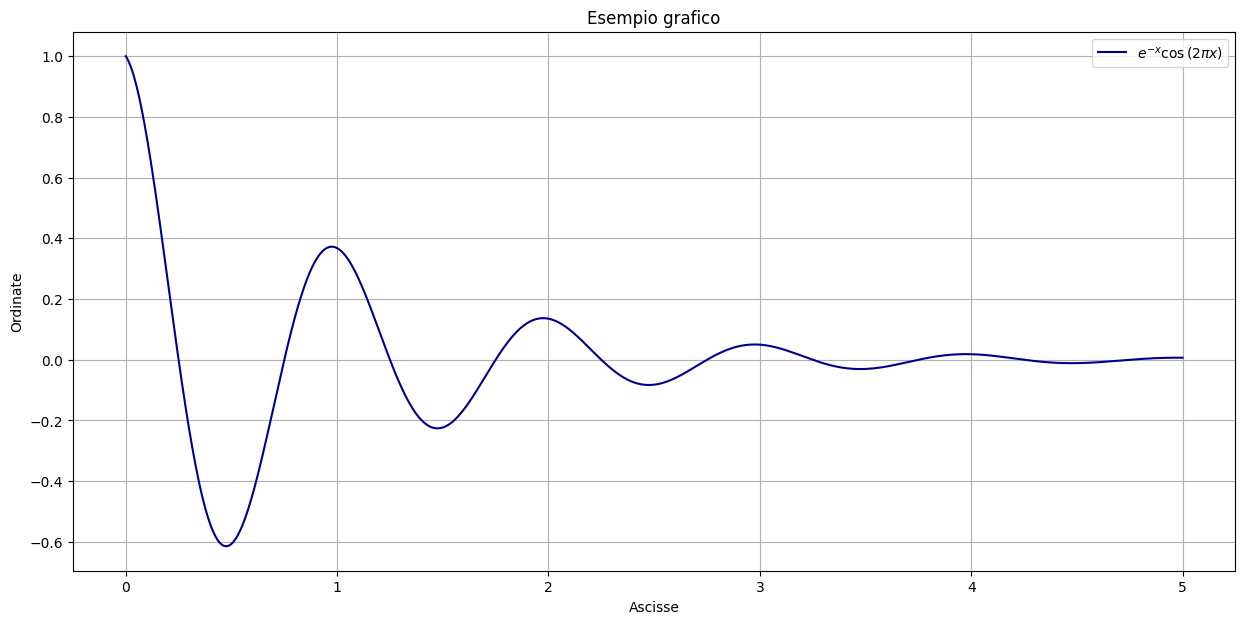

In [10]:
# Genero la funzione della quale voglio fare il plot
x = np.linspace(0, 5, 1000)
y = np.exp(-x) * np.cos(2*np.pi*x)


# Creo grafico e abbellisco come necessario
fig = plt.figure(figsize = (15, 7))
plt.plot(x, y, color = "darkblue", label = r"$e^{-x}\cos{\left(2\pi x\right)}$")

plt.title("Esempio grafico")
plt.ylabel("Ordinate")
plt.xlabel("Ascisse")

plt.legend(loc="best")
plt.grid(True)
plt.show()